In [1]:
import networkx as nx
import generator as gen
import simulate as sim
import conComp as cc
import random
import numpy as np
import mainMethods as mn


In [2]:

for i in range(50):
    g_init = gen.graph_gen(2,50,0.2,0.02)
    dev = [0.1] + [0.5] + [0.5] * 2
    std_devs = [dev, dev]
    changeVec = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
    cmat = gen.culture_init(g_init, std_devs, changeVec)
    g, culturemat = sim.simulate_iterstop(g_init,cmat)
    print(nx.average_shortest_path_length(g))

zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde
zde


NetworkXError: Graph is not weakly connected.

In [4]:
gundir = nx.DiGraph.to_undirected(g)
list(nx.algorithms.components.connected_components(gundir))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49},
 {46}]

0.9999999999999996
1.0


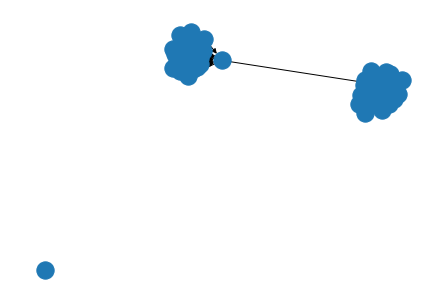

In [25]:
#ccomp = cc.Components(g)
print(g.edges[12,17]['weight'])
for i in range(100):
    g, cmat, ccomp = sim.sim_one_iter(g,cmat,ccomp,False)
print(g.edges[0,3]['weight'])
nx.draw(g)

In [26]:
g.edges(data='weight')

OutEdgeDataView([(0, 3, 1.0), (0, 8, 1.0), (0, 19, 0.9999999933315666), (0, 23, 0.9999927598643864), (0, 4, 1.0), (0, 7, 1.0), (0, 17, 0.9999999999898259), (0, 15, 0.9999999999999998), (0, 2, 0.9999999999999998), (0, 10, 1.0), (0, 20, 0.9999999999999998), (0, 6, 0.9999918128094543), (0, 14, 0.012187045127551026), (1, 0, 1.0), (1, 2, 0.9999999999999998), (1, 4, 1.0), (1, 5, 1.0), (1, 16, 1.0), (1, 19, 0.999999737513049), (1, 22, 0.9999999999999998), (1, 8, 1.0), (2, 1, 0.9999999999999998), (2, 3, 1.0), (2, 4, 1.0), (2, 10, 1.0), (2, 22, 0.9999999999999998), (2, 24, 0.9999999999999993), (2, 21, 0.9999999999999998), (2, 20, 0.9999999999999998), (2, 48, 0.3995133367712771), (2, 2, 0.5129096732129977), (3, 2, 0.9999999999999998), (3, 12, 1.0), (3, 15, 0.9999999999999998), (3, 16, 1.0), (3, 18, 0.9999999998495925), (3, 19, 0.9999999988148527), (3, 22, 0.9999999999999998), (3, 23, 0.9999996695831818), (3, 8, 1.0), (3, 4, 1.0), (3, 0, 0.9999997068319786), (3, 5, 0.9999992746532774), (3, 10, 0.

In [53]:
fail = 0
for i in range(10 **4):
    g_init = gen.graph_gen(2,50,0.2,0.02)
    if not nx.is_weakly_connected(g_init):
        fail += 1
print(fail)

4
